In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

In [5]:
# Load the datasets
train_data = pd.read_csv('loan_train.csv.csv')
test_data = pd.read_csv('loan_test.csv.csv')

In [6]:
#number of rows & columns in the dataset
train_data.shape

(614, 13)

In [7]:
#number of rows & columns in the dataset
test_data.shape

(367, 12)

In [22]:
# first 5 rows of the dataset
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849.0,0.0,128.0,360.0,1.0,2,1
1,1,1,1,1,0,0,4583.0,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000.0,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583.0,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000.0,0.0,141.0,360.0,1.0,2,1


In [8]:
# checking for missing values
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
# statistical measures of the dataset
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


C:\Users\Dnyanesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dnyanesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dnyanesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dnyanesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

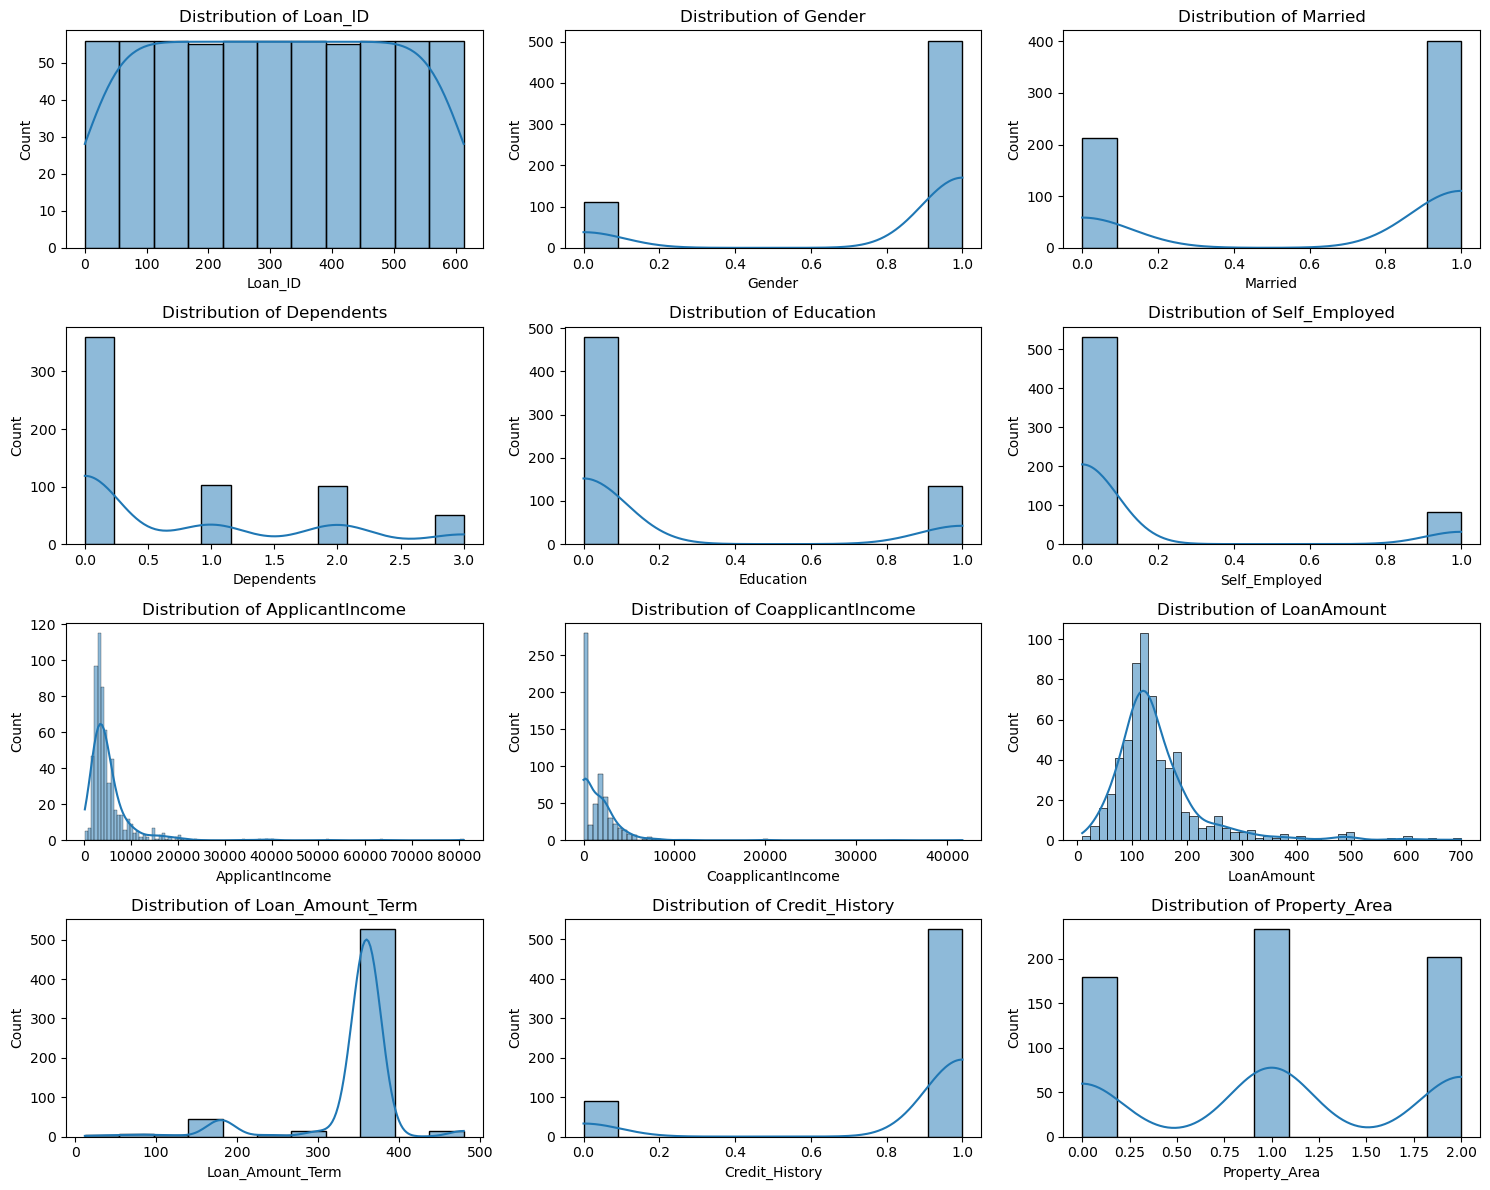

<Figure size 1500x1000 with 0 Axes>

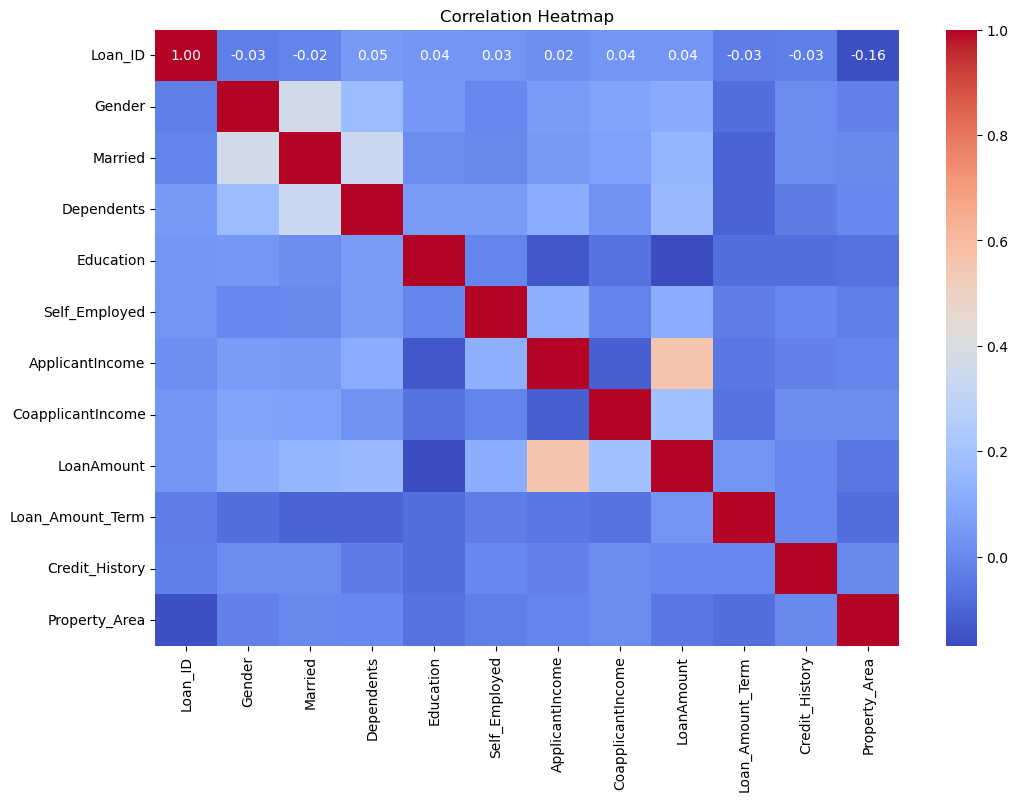

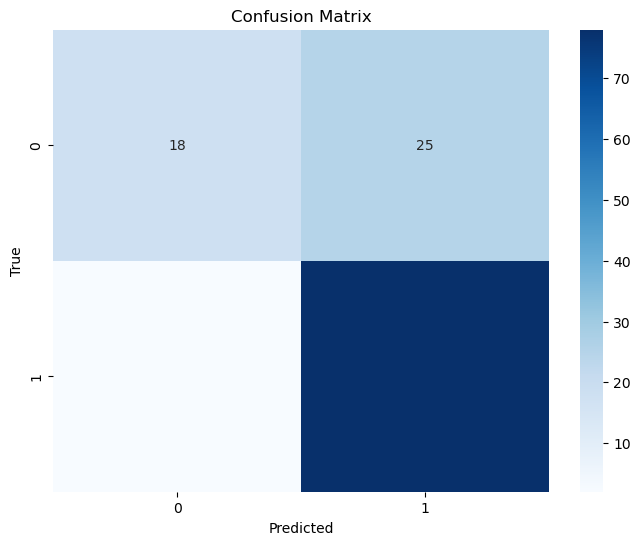

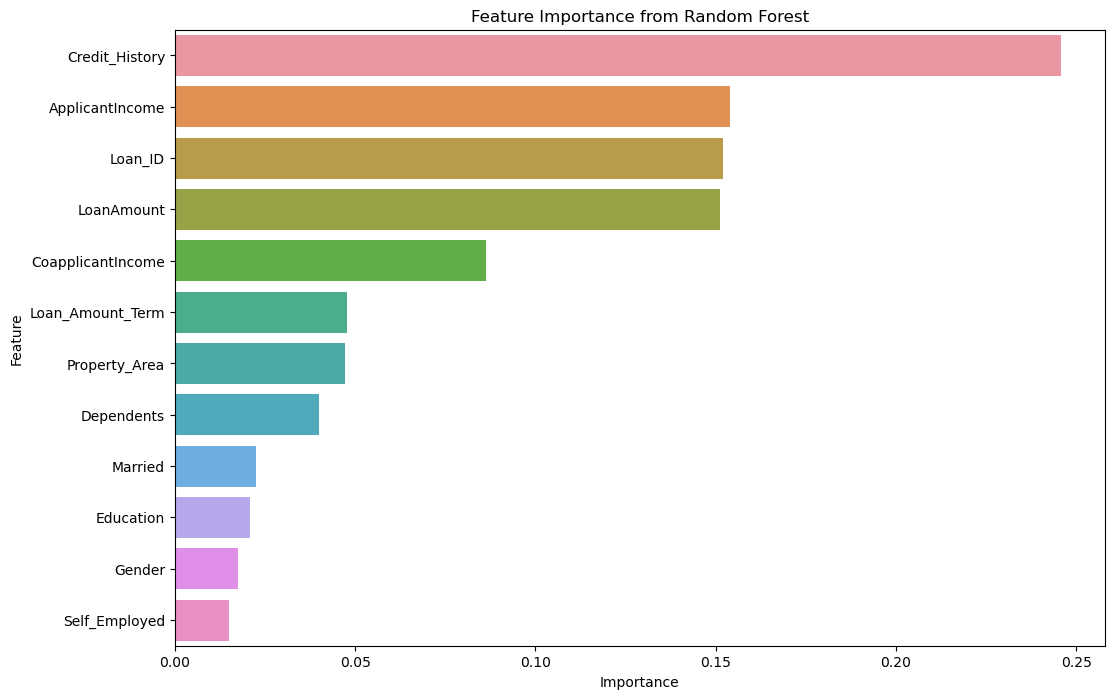

In [10]:

# Handling missing values and encoding
def preprocess_data(df):
    num_imputer = SimpleImputer(strategy='median')
    df[df.select_dtypes(include=['number']).columns] = num_imputer.fit_transform(df.select_dtypes(include=['number']))

    cat_imputer = SimpleImputer(strategy='most_frequent')
    df[df.select_dtypes(include=['object']).columns] = cat_imputer.fit_transform(df.select_dtypes(include=['object']))

    label_encoders = {}
    for column in df.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

    return df, label_encoders

# Preprocess training data
train_data, label_encoders = preprocess_data(train_data)

# Split the data into features and target variable
X = train_data.drop('Loan_Status', axis=1)
y = train_data['Loan_Status']

# Encode the target variable
y = LabelEncoder().fit_transform(y)

# Visualizing numerical features distribution
numerical_features = X.select_dtypes(include=['number']).columns
plt.figure(figsize=(15, 12)) # Increased figure height for better display
for i, col in enumerate(numerical_features):
    plt.subplot(4, 3, i + 1) # Changed grid to 4 rows x 3 columns
    sns.histplot(X[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Visualizing categorical features count
categorical_features = X.select_dtypes(include=['object', 'category']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_features):
    plt.subplot(3, 3, i + 1)
    sns.countplot(data=train_data, x=col)
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Train the model for feature importance and confusion matrix
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Confusion matrix visualization
y_pred = rf_model.predict(X_valid)
conf_matrix = confusion_matrix(y_valid, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Feature importance visualization
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importances, x='Importance', y='Feature')
plt.title('Feature Importance from Random Forest')
plt.show()


In [4]:

# Handling missing values and encoding
def preprocess_data(df):
    # Fill missing values for numerical features
    num_imputer = SimpleImputer(strategy='median')
    df[df.select_dtypes(include=['number']).columns] = num_imputer.fit_transform(df.select_dtypes(include=['number']))

    # Fill missing values for categorical features and encode them
    cat_imputer = SimpleImputer(strategy='most_frequent')
    df[df.select_dtypes(include=['object']).columns] = cat_imputer.fit_transform(df.select_dtypes(include=['object']))

    # Encoding categorical features
    label_encoders = {}
    for column in df.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

    return df, label_encoders

# Preprocess training data
train_data, label_encoders = preprocess_data(train_data)

# Split the training data into features and target variable
X = train_data.drop('Loan_Status', axis=1)
y = train_data['Loan_Status']

# Encode the target variable
y = LabelEncoder().fit_transform(y)

# Preprocess the test data
test_data, _ = preprocess_data(test_data)

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Validate the model
y_pred = rf_model.predict(X_valid)

# Evaluate the model
accuracy = accuracy_score(y_valid, y_pred)
conf_matrix = confusion_matrix(y_valid, y_pred)
class_report = classification_report(y_valid, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Make predictions on the test set
test_predictions = rf_model.predict(test_data)

# Convert predictions to original labels if needed
# (assuming 'Loan_Status' was the target)
# ... (previous code)

# Make predictions on the test set
test_predictions = rf_model.predict(test_data)

# Convert predictions to original labels if needed
# Use the label encoder fitted on the training data
test_predictions = label_encoders['Loan_Status'].inverse_transform(test_predictions)

# Save the predictions to a CSV file
output = pd.DataFrame({'Loan_ID': test_data['Loan_ID'], 'Loan_Status': test_predictions})
output.to_csv('/content/test.csv', index=False)

Accuracy: 0.7804878048780488
Confusion Matrix:
 [[18 25]
 [ 2 78]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.42      0.57        43
           1       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123

